## 2.6 PyTorch中的优化器

|类|算法名称|
|:----:|:----:|
|torch.optim.Adadelta()|Adadelta算法|
|torch.optim.Adagrad()|Adagrad算法|
|torch.optim.Adam()|Adam算法|
|torch.optim.Adamax()|Adamax算法|
|torch.optim.ASGD()|平均随机梯度下降算法|
|torch.optim.LBFGS()|L-BFGS算法|
|torch.optim.RMSprop()|RMSprop算法|
|torch.optim.Rprop()|弹性反向传播算法|
|torch.optim.SGD()|随机梯度下降算法|

|torch.optim.Adam()参数|参数说明|
|:----:|:----:|
|params|待优化参数的iterable或定义了参数组的dict，通常为model.parameters()|
|lr|算法学习率，默认为0.001|
|betas|用于计算梯度以及梯度平方的运行平均值的系数，默认为(0.9, 0.999)|
|eps|为了增加数值计算的稳定性而加到分母里的项，默认为1e-8|
|weight_decay|权重衰减（L2惩罚），默认为0|

In [4]:
import torch
import torch.nn as nn
# 建立一个测试网络
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet, self).__init__()
        # 定义隐藏层
        self.hidden = nn.Sequential(nn.Linear(13, 10), nn.ReLU(), )
        # 定义预测回归层
        self.regression = nn.Linear(10, 1)
    # 定义网络的向前传播路径
    def forward(self, x):
        x = self.hidden(x)
        output = self.regression(x)
        # 输出为output
        return output
# 输出网络结构
testnet = TestNet()

> 针对一个已经建立好的深度学习网络，在定义优化器时通常使用下面的方式定义：

In [7]:
# 优化器使用方式1：为不同的层定义统一的学习率
optimizer = torch.optim.Adam(testnet.parameters(), lr=0.001)

> 这种方式中Adam()的第一个参数为testnet.parameters()，表示对testnet网络中的所有需要优化的参数进行更新优化，而且使用统一的学习率lr=0.001

In [8]:
# 优化器使用方式2：为不同的层定义不同的学习率
optimizer = torch.optim.Adam(
    [{"params":testnet.hidden.parameters(), "lr":0.001},
     {"params":testnet.regression.parameters(), "lr":0.01}],
    lr=1e-2
)

> 在这种方式中，第一个参数的字典使用params关键字来指定需要优化层的权重参数，lr来制定相应的学习率<p> 上述程序表示testnet.hidden层对应的参数将会使用0.0001的学习率，testnet.regression层对应的参数将会使用0.01的学习率，而且lr=1e-2将作用于testnet中其他没有特殊指定的所有参数

> 定义好优化器后，需要将optimizer.zero_grad()方法和optimizer.step()方法一起使用，对网络中的参数进行更新
>> optimizer.zero_grad()方法表示在进行反向传播之前，对参数的梯度进行清空<p> optimizer.step()方法表示在损失的反向传播loss.backward()方法计算出梯度之后，调用step()方法进行参数更新

> 如对数据集加载器dataset、深度网络testnet、优化器optimizer、损失函数loss_fn等，可使用下面的程序进行网络参数更新：

In [ ]:
# 对目标函数进行优化时通常的格式
for input, target in dataset:
    optimizer.zero_grad() # 梯度清零
    output = testnetst(input) # 计算预测值
    loss = loss_fn(output, target) # 计算损失
    loss.backward() # 损失后向传播
    optimizer.step() # 更新网络参数

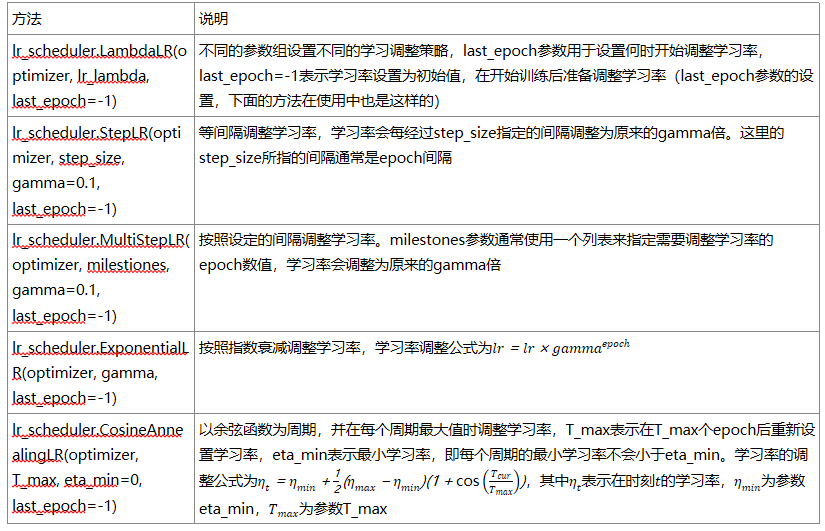

> 上述的学习率调整方法一般以如下方式进行：

In [ ]:
scheduler = ... # 设置学习率调整方式
for epoch in range(100):
    train(...)
    validate(...)
    scheduler.step() # 更新学习率

> 设置学习率调整方法的类，一般是在网络的训练之前，而学习率调整则是在网络的训练过程中，并通过scheduler.step()来更新